# Task1: Build a machine learning model to predict the aggregate rating of a restaurant based on other features.

In [163]:
import numpy as np
import pandas as pd

In [164]:
df=pd.read_csv("/content/Dataset  (1).csv")
print(df.columns)


Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')


In [145]:
df.head(5)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [165]:
df.describe()

,Restaurant ID,Country Code,Longitude,Latitude,Average Cost for two,Price range,Aggregate rating,Votes
count,9.551000e+03,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000
mean,9.051128e+06,18.365616,64.126574,25.854381,1199.210763,1.804837,2.666370,156.909748
std,8.791521e+06,56.750546,41.467058,11.007935,16121.183073,0.905609,1.516378,430.169145
min,5.300000e+01,1.000000,-157.948486,-41.330428,0.000000,1.000000,0.000000,0.000000
25%,3.019625e+05,1.000000,77.081343,28.478713,250.000000,1.000000,2.500000,5.000000
50%,6.004089e+06,1.000000,77.191964,28.570469,400.000000,2.000000,3.200000,31.000000
75%,1.835229e+07,1.000000,77.282006,28.642758,700.000000,2.000000,3.700000,131.000000
max,1.850065e+07,216.000000,174.832089,55.976980,800000.000000,4.000000,4.900000,10934.000000


In [166]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

In [168]:

df.isnull().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

In [169]:
df.dropna(inplace=True)

In [170]:

df[df.duplicated()]

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes


In [172]:

features=["City", "Average Cost for two", 'Cuisines', 'Has Online delivery','Aggregate rating']
df2=df[features]
df2

,City,Average Cost for two,Cuisines,Has Online delivery,Aggregate rating
0,Makati City,1100,"French, Japanese, Desserts",No,4.8
1,Makati City,1200,Japanese,No,4.5
2,Mandaluyong City,4000,"Seafood, Asian, Filipino, Indian",No,4.4
3,Mandaluyong City,1500,"Japanese, Sushi",No,4.9
4,Mandaluyong City,1500,"Japanese, Korean",No,4.8
...,...,...,...,...,...
9546,��stanbul,80,Turkish,No,4.1
9547,��stanbul,105,"World Cuisine, Patisserie, Cafe",No,4.2
9548,��stanbul,170,"Italian, World Cuisine",No,3.7
9549,��stanbul,120,Restaurant Cafe,No,4.0


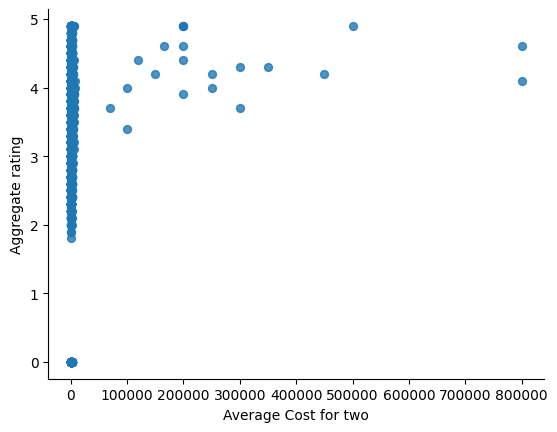

In [173]:
from matplotlib import pyplot as plt
df2.plot(kind='scatter', x='Average Cost for two', y='Aggregate rating', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

In [174]:

from sklearn.preprocessing import OneHotEncoder

encoder=OneHotEncoder()
df3=encoder.fit_transform(df2)


In [175]:
from sklearn.model_selection import train_test_split

x=df3
y=df["Aggregate rating"]

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size =0.3 , random_state=1)

In [176]:
from sklearn.ensemble import RandomForestRegressor

model1=RandomForestRegressor()
model1.fit(x_train,y_train)



RandomForestRegressor()

In [177]:
y_train_pred1=model1.predict(x_train)
y_test_pred1=model1.predict(x_test)
y_train_pred1,y_test_pred1

(array([3. , 2.4, 3.3, ..., 3.1, 4. , 0. ]),
 array([3. , 3.9, 4.2, ..., 3.3, 3.9, 3.9]))

In [178]:
from sklearn.metrics import mean_squared_error,r2_score
rf_train_MSE=mean_squared_error(y_train,y_train_pred1)
rf_train_r2=r2_score(y_train,y_train_pred1)

rf_test_MSE=mean_squared_error(y_test,y_test_pred1)
rf_test_r2=r2_score(y_test,y_test_pred1)

In [179]:
print('RF MSE(Train) :',rf_train_r2)
print('RF R2(Test):',rf_train_MSE)
print('RF MSE(Test) :',rf_test_MSE)
print('RF R2(Test) :',rf_test_r2)

RF MSE(Train) : 0.9997030780906819
RF R2(Test): 0.0006917484653391224
RF MSE(Test) : 0.0065987017114914346
RF R2(Test) : 0.9970397778212886


In [180]:
from sklearn.linear_model import LinearRegression


In [181]:
model2 = LinearRegression()
model2.fit(x_train, y_train)

LinearRegression()

In [182]:
y_train_pred2=model2.predict(x_train)
y_test_pred2=model2.predict(x_test)
y_train_pred2,y_test_pred2

(array([ 2.99999469e+00,  2.39999068e+00,  3.29999777e+00, ...,
         3.10000134e+00,  3.99999780e+00, -1.56416731e-05]),
 array([2.99997639, 3.90000087, 4.19998712, ..., 3.2999907 , 3.89999595,
        3.89999902]))

In [183]:
from sklearn.metrics import mean_squared_error,r2_score
lr_train_MSE=mean_squared_error(y_train,y_train_pred2)
lr_train_r2=r2_score(y_train,y_train_pred2)

lr_test_MSE=mean_squared_error(y_test,y_test_pred2)
lr_test_r2=r2_score(y_test,y_test_pred2)

In [184]:
print('RF MSE(Train) :',lr_train_r2)
print('RF R2(Test):',lr_train_MSE)
print('RF MSE(Test) :',lr_test_MSE)
print('RF R2(Test) :',lr_test_r2)

RF MSE(Train) : 0.999999999650123
RF R2(Test): 8.151196501947273e-10
RF MSE(Test) : 7.256371156003578e-09
RF R2(Test) : 0.9999999967447428


[]

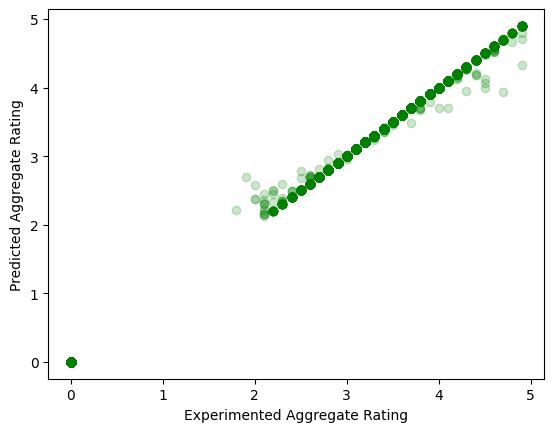

In [185]:
import matplotlib.pyplot as plt
import numpy as np

plt.scatter(x=y_train,y=y_train_pred1,alpha=0.2,c="green")
plt.ylabel("Predicted Aggregate Rating")
plt.xlabel("Experimented Aggregate Rating")
plt.plot()

Text(0, 0.5, 'No. of Restaurants ')

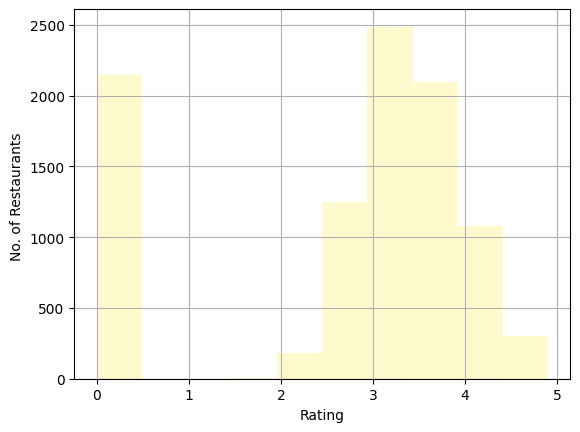

In [188]:
df['Aggregate rating']=df['Aggregate rating'].apply(lambda r:float(r))
df['Aggregate rating'].hist(color='lemonchiffon')
plt.xlabel('Rating')
plt.ylabel('No. of Restaurants ')

Text(0, 0.5, 'Number of Restaurants')

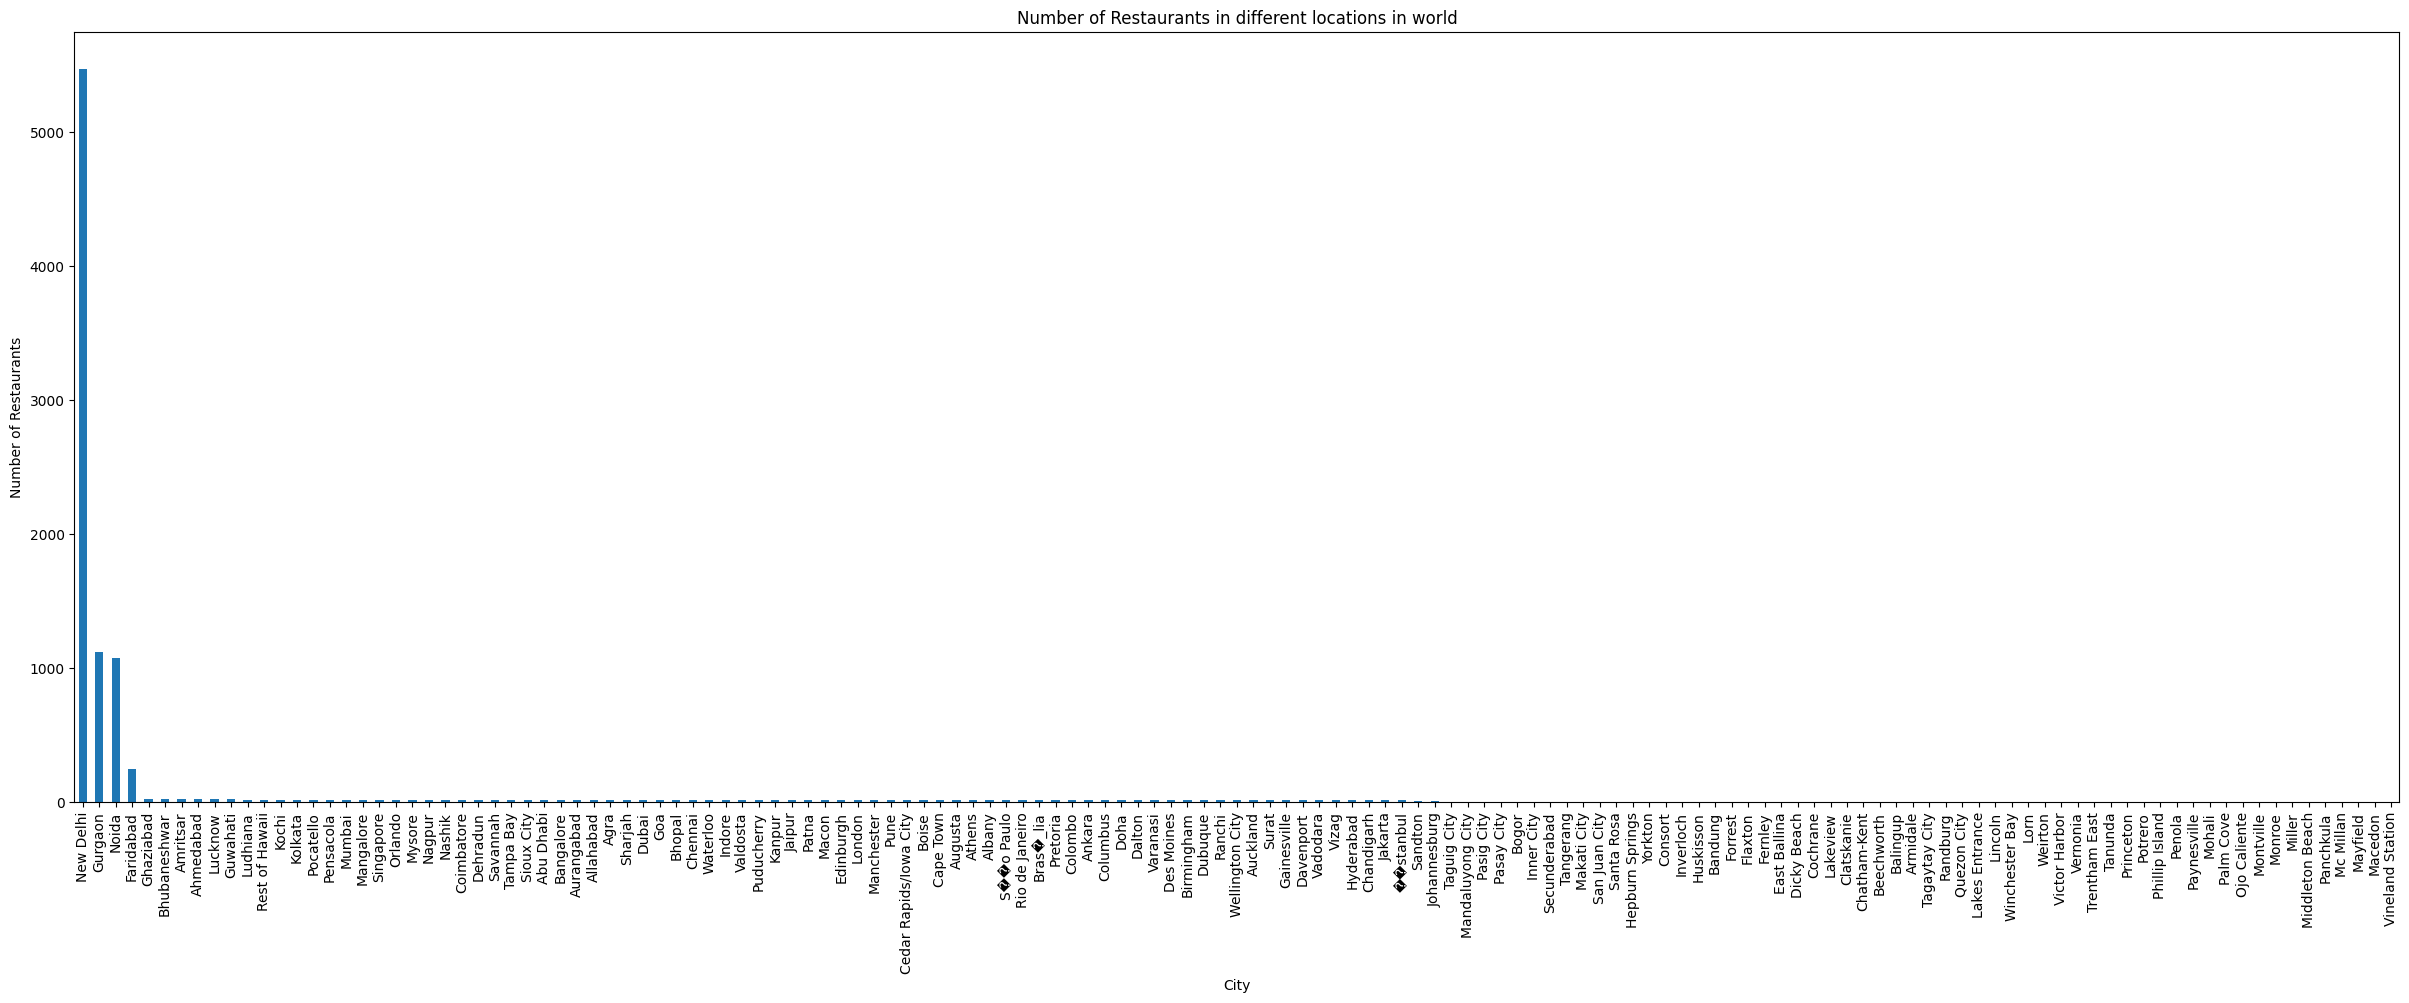

In [152]:
plt.figure(figsize=(30,10))
city=df['City'].value_counts()
city.plot(kind='bar')
plt.title('Number of Restaurants in different locations in world')
plt.xlabel('City')
plt.ylabel('Number of Restaurants')

Text(0, 0.5, 'counts')

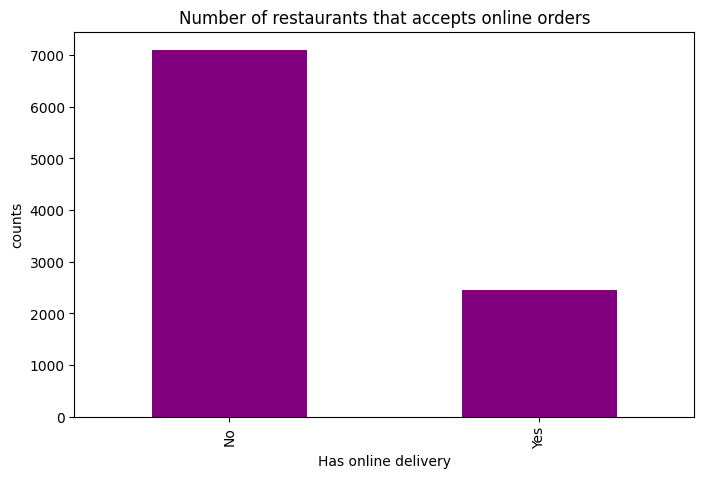

In [158]:
plt.figure(figsize=(8,5))
online_orders=df['Has Online delivery'].value_counts()
online_orders.plot(kind='bar',color="purple")
plt.title('Number of restaurants that accepts online orders')
plt.xlabel('Has online delivery')
plt.ylabel('counts')

Text(0, 0.5, 'No. of restaurants')

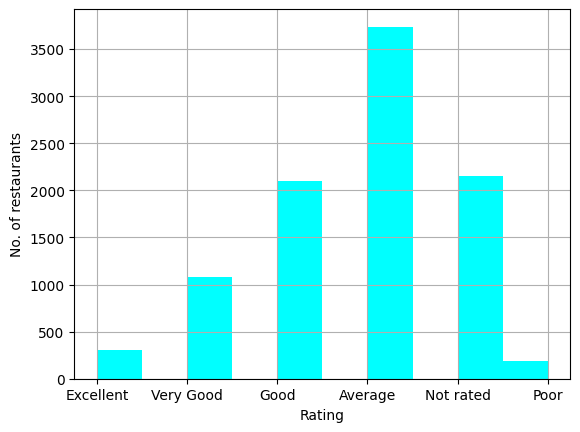

In [162]:
df['Rating text']=df["Rating text"].apply(lambda r:str(r))
df['Rating text'].hist(color='cyan')
plt.xlabel('Rating')
plt.ylabel("No. of restaurants")